In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# more imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pydotplus
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "HW7"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# Warnings
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
print(os.getcwd())

C:\Users\ainspector.BH\Documents\Python Scripts


In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} pydotplus

Prepare the data. Load breast cancer data

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.target[0:20])
print(list(cancer.target_names))
print(cancer.data[0:5])
print(list(cancer.feature_names))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
['malignant', 'benign']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 

# Problem 1. 
Break the data into training (80%)/testing data(20%). Estimate a tree classification model with maximum depth of 2. Plot the tree and calculate the accuracy rate. Predict target using all features, don't forget to set random numbers to 42. 

In [5]:
# Starting point
X = cancer.data 
y = cancer.target
random.seed(42)   
os.environ["PATH"] += os.pathsep + "C:/Users/ainspector.BH/programs/graphviz-2.38/release/bin/"

In [ ]:
#tree_clf = DecisionTreeClassifier(max_depth=2)
#tree_clf.fit(X, y)

In [6]:
X.shape

(569, 30)

In [7]:
y.shape

(569,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="cancer_tree.dot",
        feature_names=cancer.feature_names[:],
        class_names=cancer.target_names,
        rounded=True,
        filled=True
    )

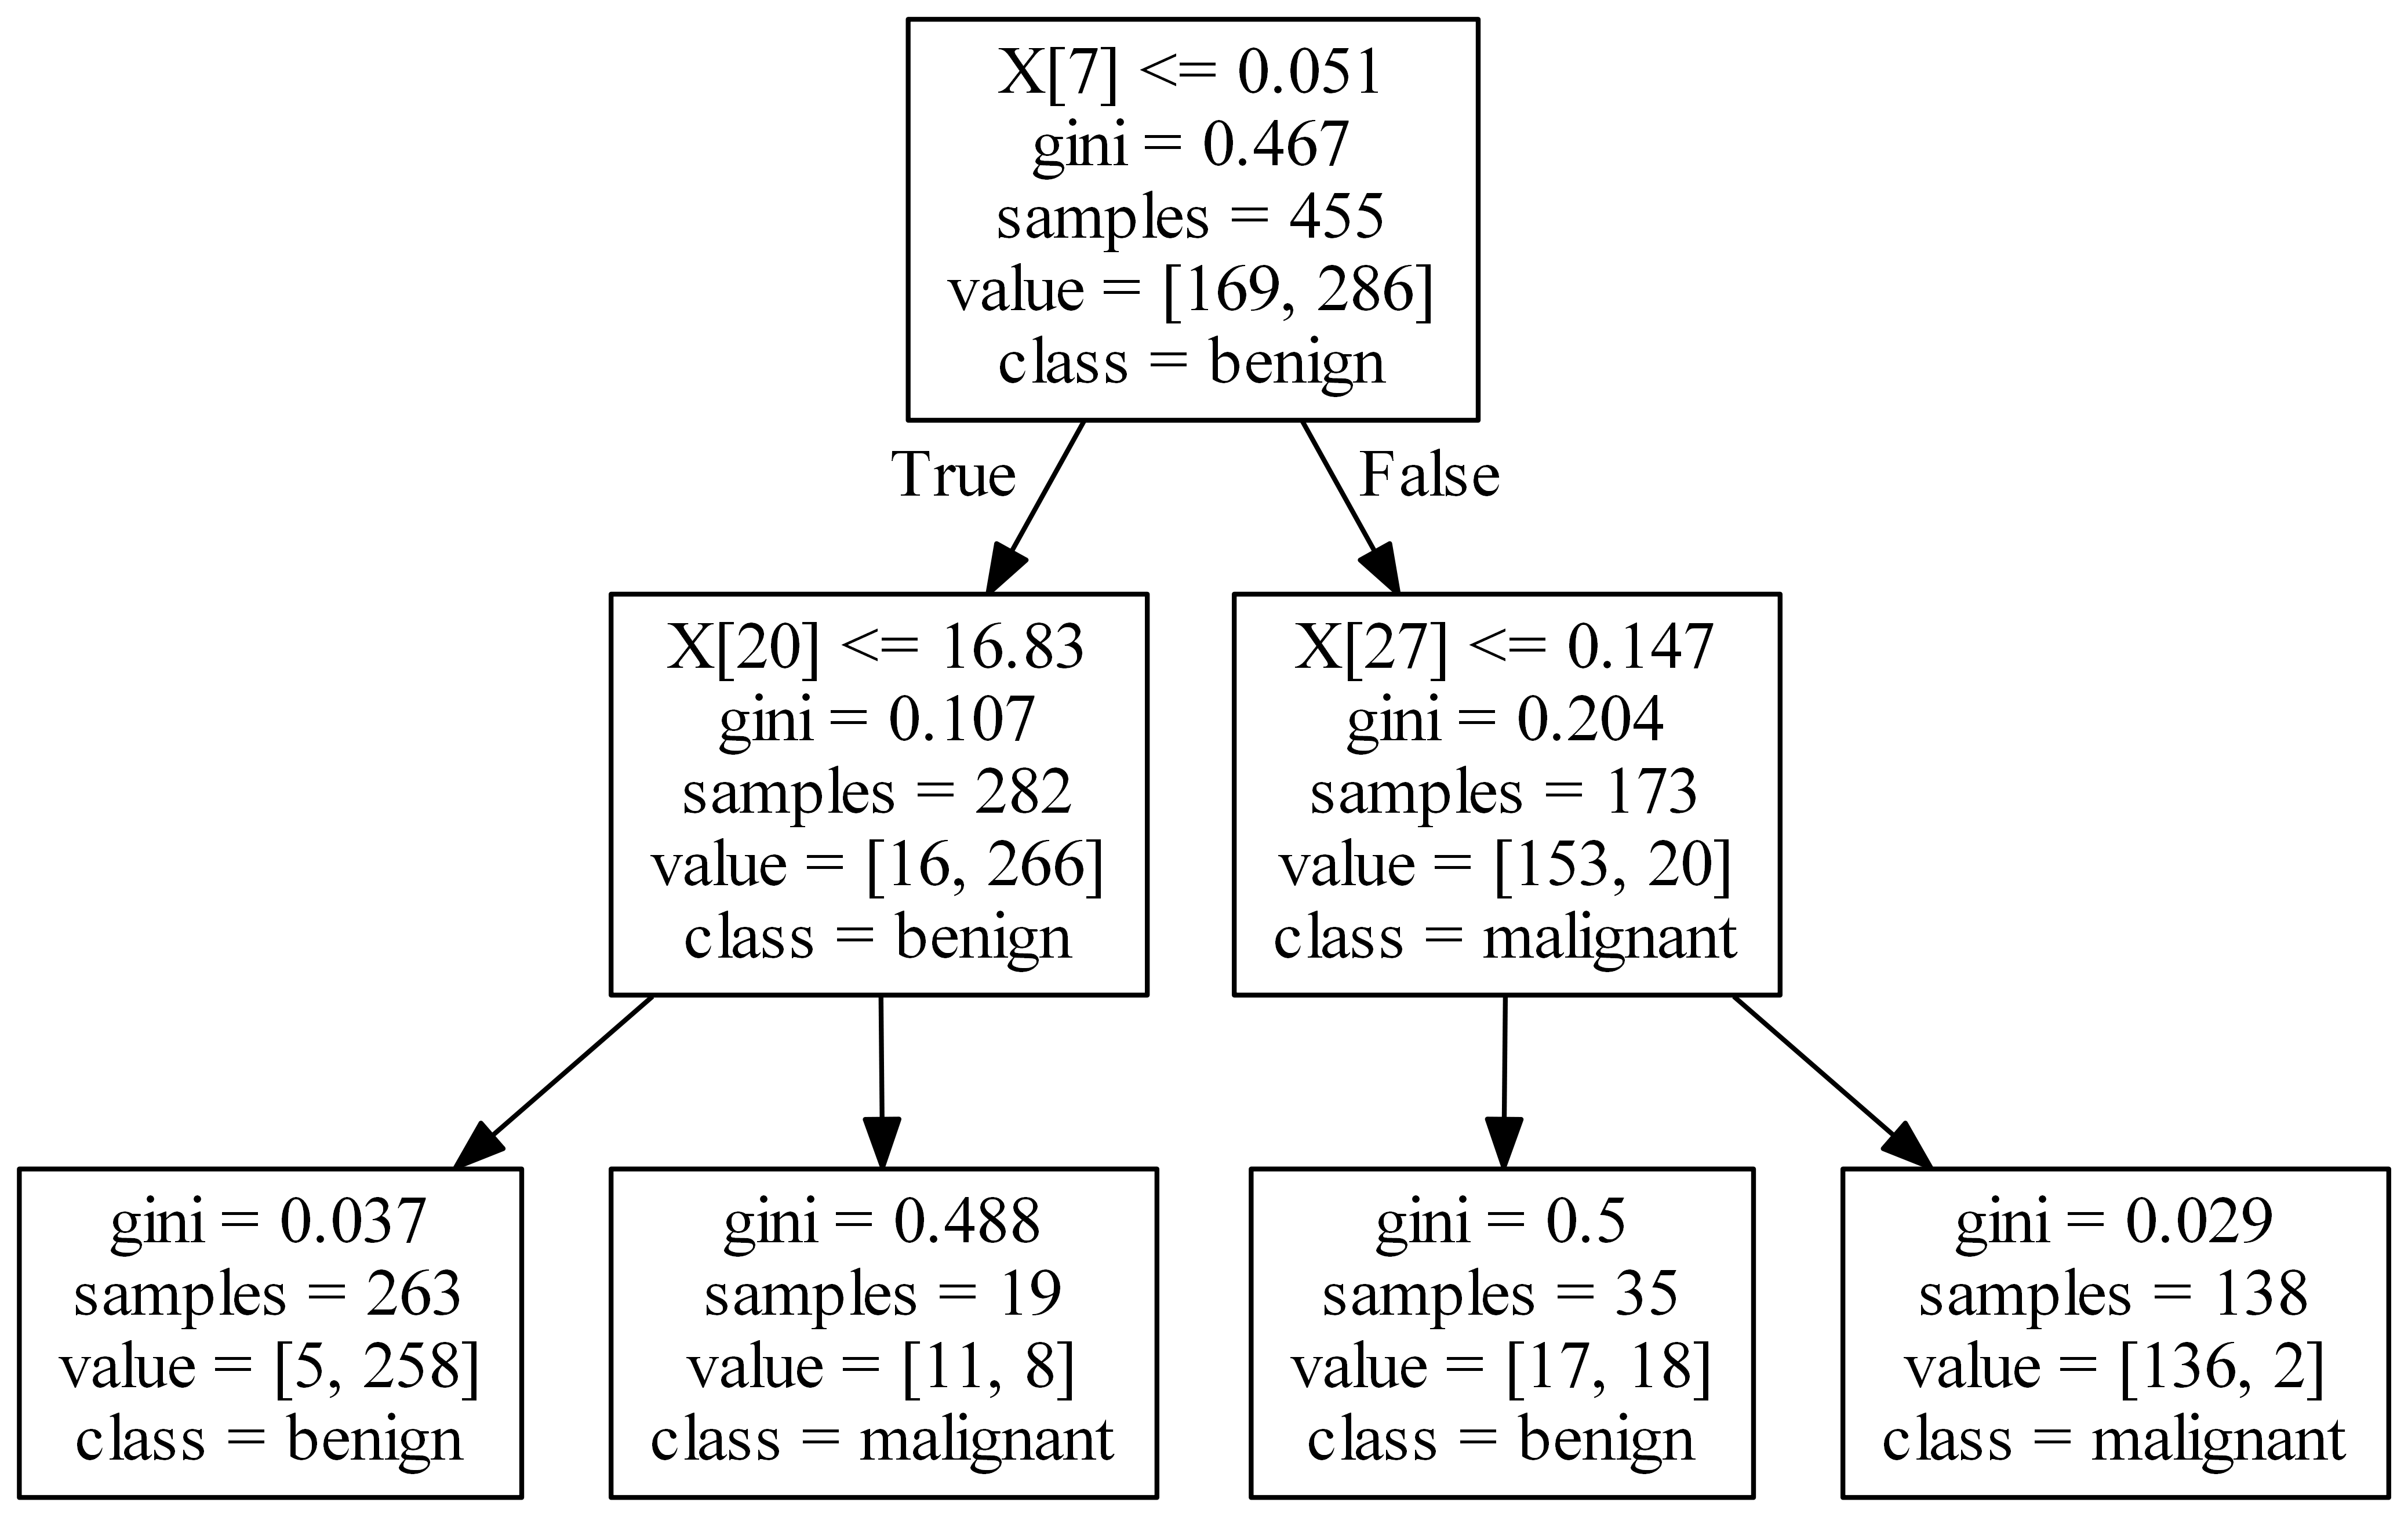

In [11]:
dot_data = tree.export_graphviz(tree_clf, out_file='tree1.dot', 
                                class_names=cancer.target_names)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree1.png')

In [12]:
from sklearn.metrics import accuracy_score
#y_pred = grid_search_cv.predict(X_test)
#accuracy_score(y_test, y_pred)
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96078431, 0.89403974, 0.93377483])

# Problem 2

Problem 2: 
Estimate an unrestricted tree using full data (training + testing). Find two most important features and create a scatter plot of malignant and benign tumors along the two axes of two most important feature. Hint: For example of a graph look at:
https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels
Do you think the data need rotation?

In [13]:
tree2_clf = DecisionTreeClassifier(max_depth=2)
tree2_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree2_clf,
        out_file="cancer_tree2.dot",
        feature_names=cancer.feature_names[:],
        class_names=cancer.target_names,
        rounded=True,
        filled=True
    )

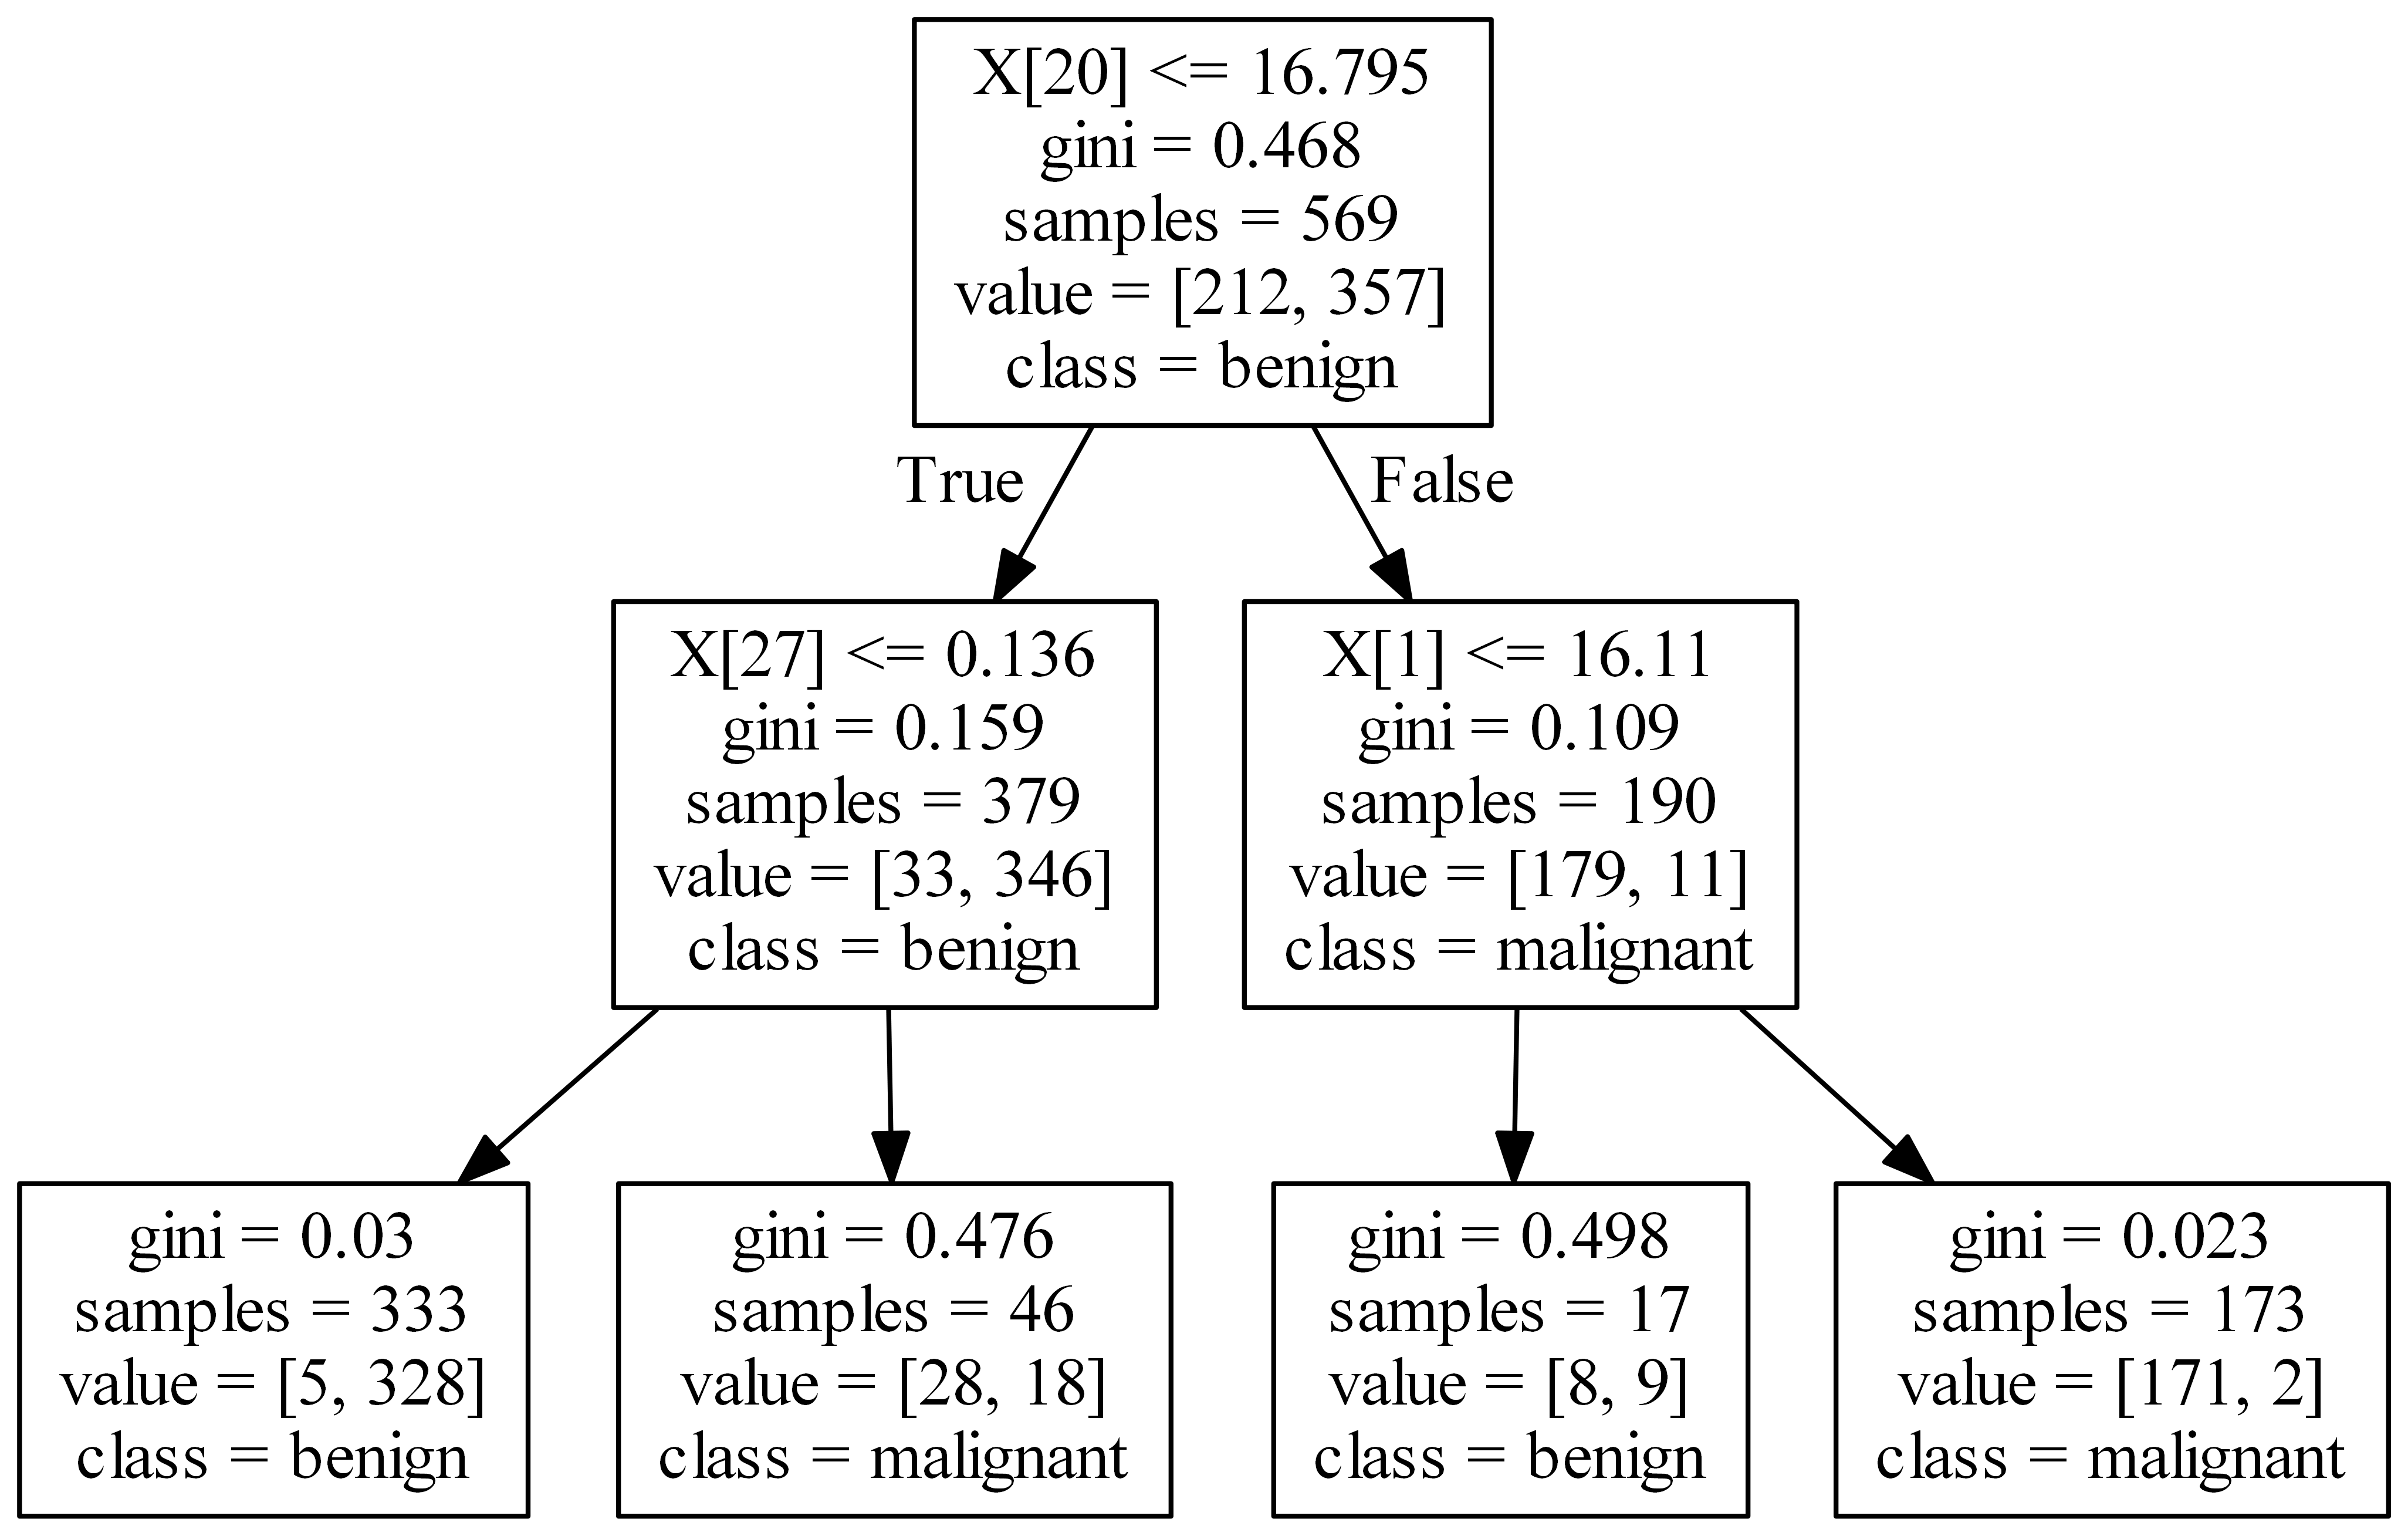

In [15]:
dot_data = tree.export_graphviz(tree2_clf, out_file='tree2.dot', 
                                class_names=cancer.target_names)
from subprocess import call
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree2.png')

# Problem 3
Find approximately optimal rotation angle of the two most important features. Rotate them. Plot in in the scatter plot. Hint angle is measure in Pi's use fractions.

In [ ]:
# Rotiation angle
angle = np.pi / 180 * 20
# Create rotaton matrix 2x2 for each point on a 2-dimensional plane
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
# Multiply x-data by the rotation matrix to shift the points
Xr = X.dot(rotation_matrix)
# Estimate a new tree
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
# Tree with depth 3 is enough to classify data almost perfectly.
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

In [ ]:
dot_data = tree.export_graphviz(tree_clf_r, out_file='tree.dot', 
                                feature_names=["petal width", "petal lentgh"],  
                                class_names=iris.target_names)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
tree2_clf.plot(kind='scatter', x="Self-reported health", y='Life satisfaction', figsize=(8,4))

 # Problem 4
In the main data drop variables used in the problem 3. Add instead the rotated variables (substitution). 
Estimate accuracy score using with a tree classifier with max depth = 2 (Same as in problem 1). How much did we gain from rotation?

# Problem 5
Generate samples of 100, 10,000 and 100,000, moons using the code below. Set random seed at 42. Split data in training and testing sets. Estimate separately Logistic, Random Forest, SVC and the hard voting classifier. What happens to the accuracy score as you increase the number of observations?  I want you also to "feel" the slowness of SVM even with moderate data. 

In [16]:
#pg186 Creates and trains a voting classifier, composed of three diverse classifiers
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [17]:
X1, y1 = make_moons(n_samples=100, noise=0.30, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
X2, y2 = make_moons(n_samples=10000, noise=0.30, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)
X3, y3 = make_moons(n_samples=100000, noise=0.30, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)
    print(clf.__class__.__name__, accuracy_score(y1_test, y1_pred))

LogisticRegression 0.96
RandomForestClassifier 0.88
SVC 0.92
VotingClassifier 0.96


C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:

In [19]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X2_train, y2_train)
    y2_pred = clf.predict(X2_test)
    print(clf.__class__.__name__, accuracy_score(y2_test, y2_pred))

C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression 0.8588
RandomForestClassifier 0.908
SVC 0.9196


C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ainspector.BH\App\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.9144


In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X3_train, y3_train)
    y3_pred = clf.predict(X3_test)
    print(clf.__class__.__name__, accuracy_score(y3_test, y3_pred))

Accuracy score decreases as the number of observations increases.
I did not time them, but SVM took a significantly longer time as observations increase.

# Problem 6
Generate data using the code provided below. Using testing accuracy as metric, estimate bagging random trees estimator with 200 estimators. Try different numbers of samples: 10, 100, 300, and 1000. What is optimal number of samples to be used? <br>
BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    max_samples= ?, bootstrap=True, n_jobs=-1, random_state=42)

In [20]:
X, y = make_moons(n_samples=2000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
#pg 188 Bagging
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    max_samples=10, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [23]:
print(accuracy_score(y_test, y_pred))

0.818


In [24]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.852


In [25]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    max_samples=300, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


In [26]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    max_samples=1000, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.832


The optimal samples from the sets tested was 10, however, the number started to decrease as samples increased, so it's possible that there is a higher number of samples than provides a better score.

# Problem 7
Use data from the last problem. Find optimal learning rate, number of estimators and maximum depth using GradientBoostingRegressor,and Randomize grid search. Set a grid: number of estimators from 1 to 10, and maximum depth from 1 to 10. Set learning_rate = 0.1. Try 100 iterations. Example for randomizeSearch:

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=?, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbrt = GradientBoostingClassifier(max_depth=?, n_estimators=?, learning_rate = 0.1, random_state=42)  

Which estimator was the best? What was the accuracy of the best estimator?


In [34]:
X, y = make_moons(n_samples=2000, noise=0.40, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y)
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html

In [35]:
from scipy.stats import randint as sp_randint
param_distribs = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

#rnd_search = RandomizedSearchCV(bag_clf, param_distributions=param_distribs, n_iter=100, cv=5, 
#                                scoring='neg_mean_squared_error', random_state=42)
#rnd_search.fit(X_train, y_train)
#y_pred_rf = rnd_search.predict(X_val)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [55]:
#https://stackoverflow.com/questions/53782169/random-forest-tuning-with-randomizedsearchcv
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, 
                               scoring="neg_mean_squared_error", verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
y_pred_rf = rf_random.predict(X_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished


In [56]:
rf_random.best_params_

{'n_estimators': 9,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

In [57]:
best_random = rf_random.best_estimator_
print(accuracy_score(y_test, y_pred_rf))

0.472


In [32]:
#pg 197 Gradient Boosting, pg 200
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
gbrt = GradientBoostingClassifier(max_depth=10, n_estimators=10, learning_rate=0.1, random_state=42)
#gbrt = GradientBoostingRegressor(max_depth=10, n_estimators=10, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best=GradientBoostingClassifier(max_depth=10,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [33]:
print(accuracy_score(y_val, y_pred))

0.502


Gradient Boosting appears to be the best estimator, with an accuracy of 50.2% (not very good).